In [1]:
import cv2

participant_number = '3'
video_path = f"./data/Videos/P{participant_number}.avi"


cap = cv2.VideoCapture(video_path)

In [2]:
from models.frame import Frame
from typing import List

frames: List[Frame] = []
cap = cv2.VideoCapture(video_path)
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(Frame(len(frames), participant_number, frame))
cap.release()

KeyboardInterrupt: 

In [3]:
%load_ext autoreload
%autoreload 2
from utils.face_analyzer import FaceAnalyzer
import random

face_analyzer = FaceAnalyzer()
frames_selection = random.sample(frames, 20)

# Face

In [4]:
for frame in frames_selection:
    frame.face = face_analyzer.get_face(frame.image)

# Smile

In [5]:
for frame in frames_selection:
    frame.smile = face_analyzer.get_smile(frame.image, frame.face) if frame.face is not None else None

# Facial Interest Points

In [6]:
for frame in frames_selection:
    frame.face_interest_points = face_analyzer.get_face_interest_points(frame)

# Selected Facial Features

In [7]:
for frame in frames_selection:
    if frame.face_interest_points:
        frame.selected_facial_landmarks = face_analyzer.get_selected_facial_features(frame.face_interest_points)

# Display Frames

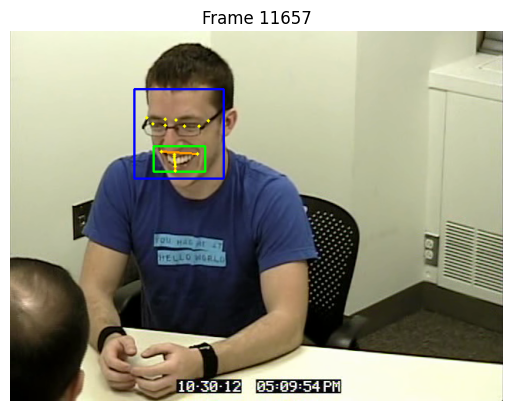

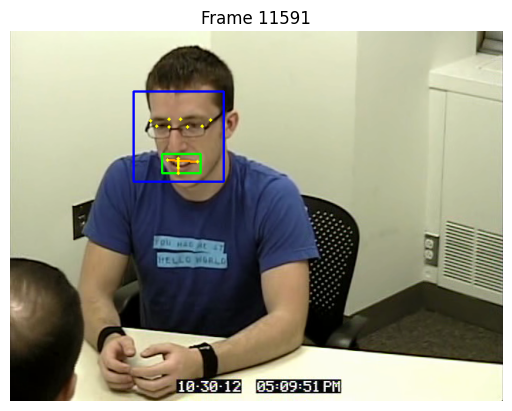

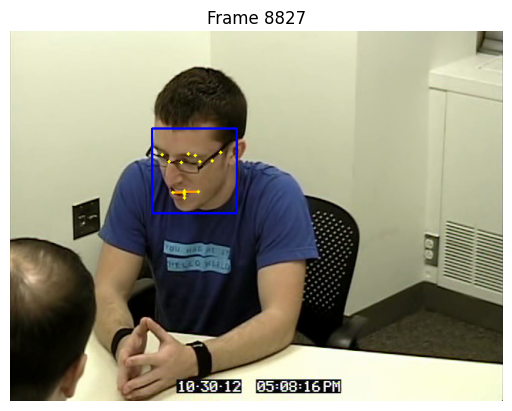

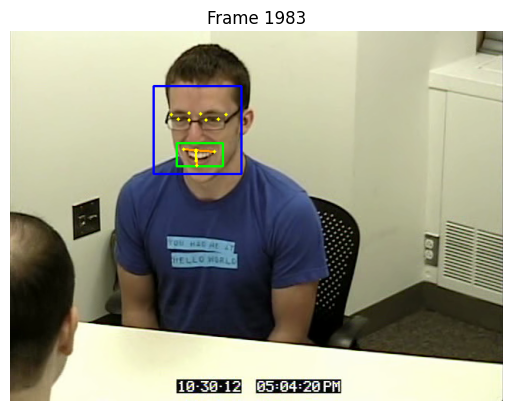

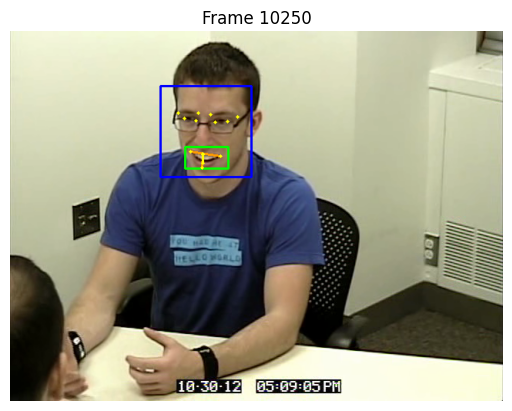

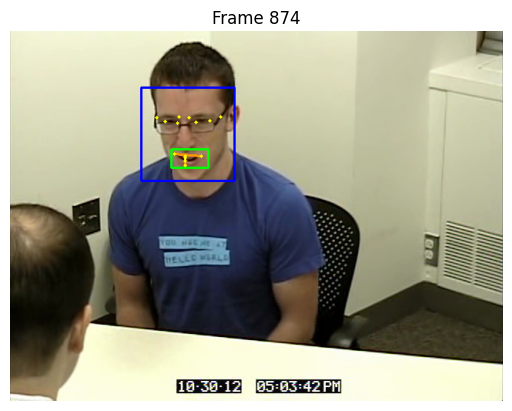

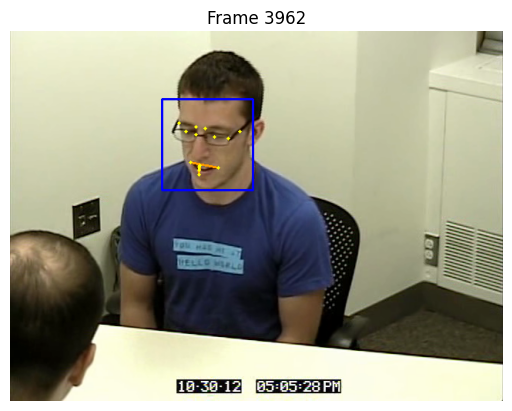

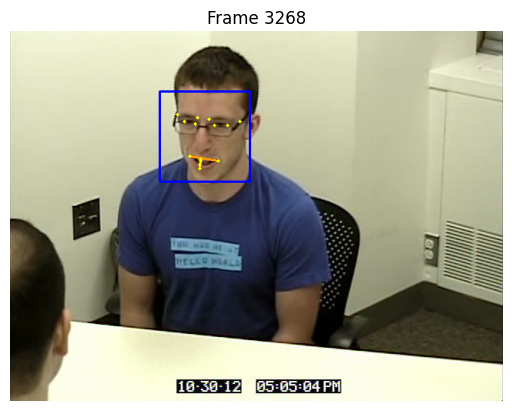

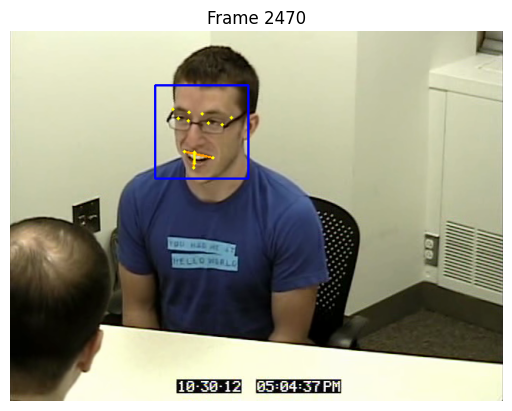

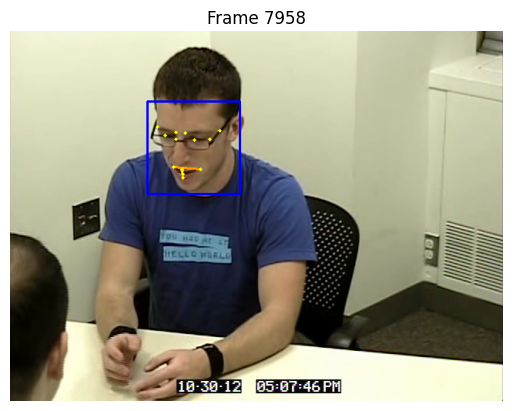

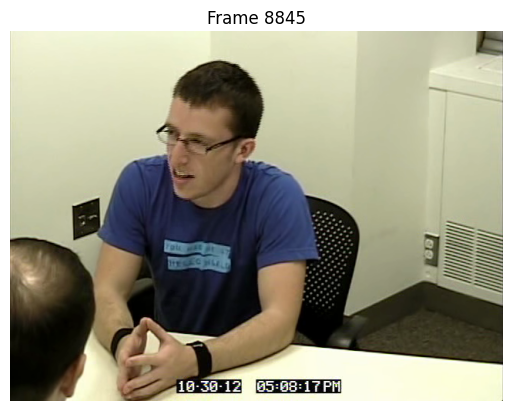

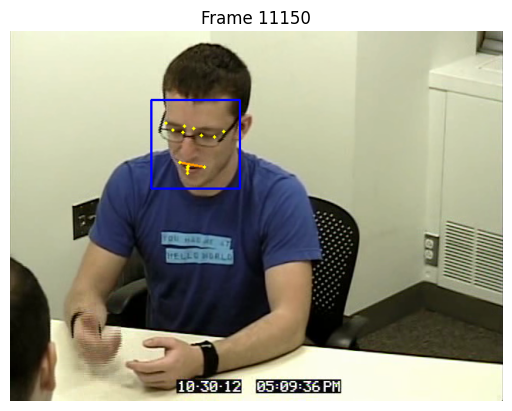

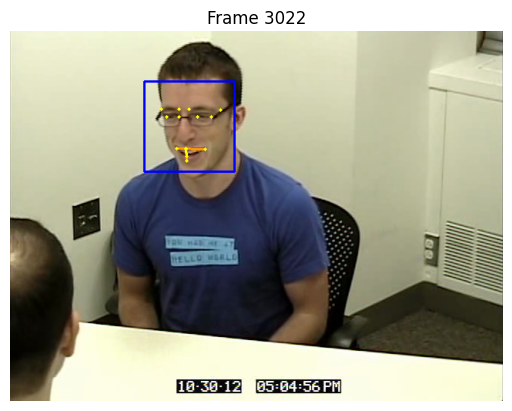

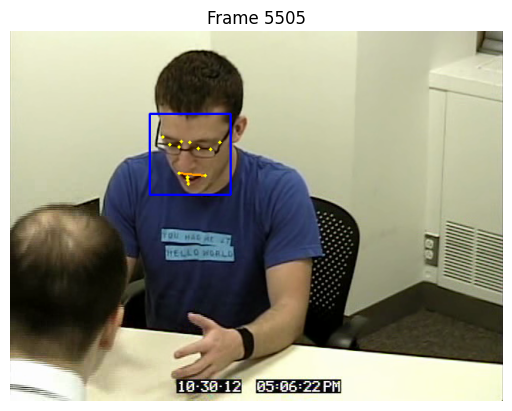

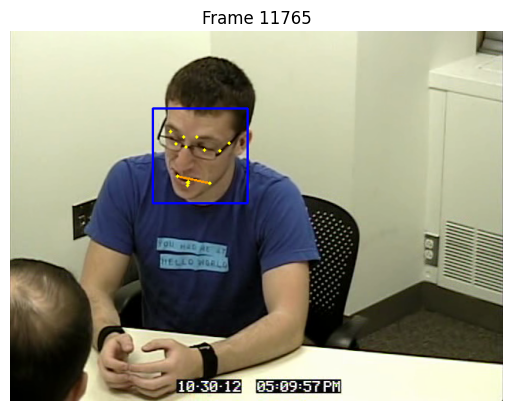

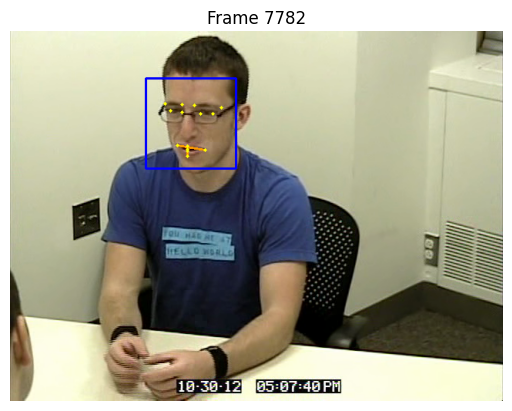

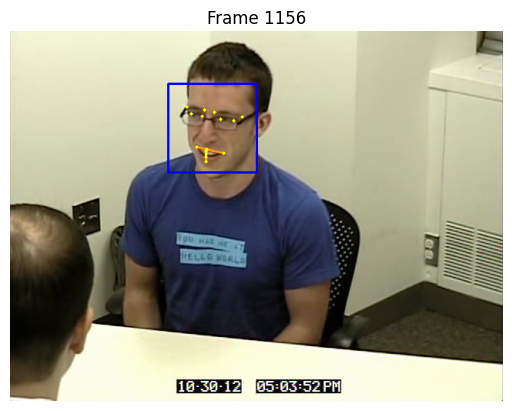

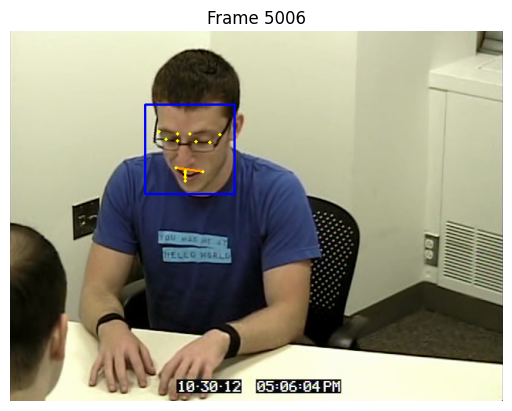

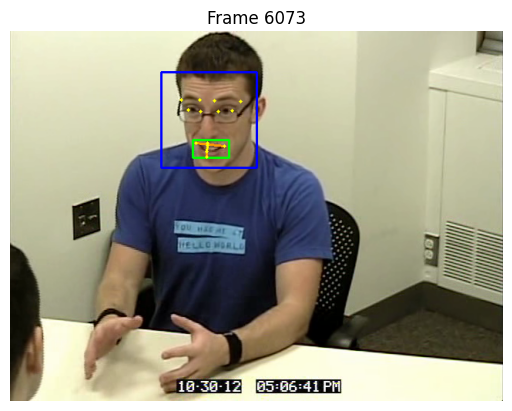

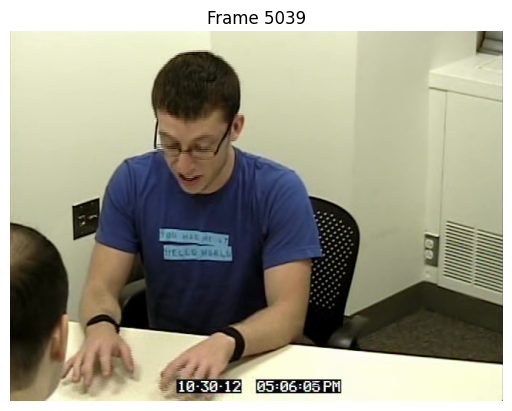

In [8]:
for frame in frames_selection:
    frame.create_drawable_image_copy()
    frame.draw_face()
    frame.draw_smile()
    # frame.draw_facial_landmarks()
    frame.draw_selected_facial_landmarks()
    frame.display()